# Import Libraries and Data

In [1]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow    # parquet engine library

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sns.set_palette("Paired") # crest

%pylab inline
%matplotlib inline

pd.set_option('expand_frame_repr', False)  
pd.set_option('display.max_rows', None)   

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/Amex_Default_Prediction_Kaggle_Competition/train.parquet'
train = pd.read_parquet(train_path)



In [4]:
label_path = '/content/drive/MyDrive/Amex_Default_Prediction_Kaggle_Competition/train_labels.csv'
label = pd.read_csv(label_path)


# Data Overview

In [5]:
train.shape

(5531451, 190)

In [6]:
train.head(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,0.004709,...,-1,-1,-1,0,0,0.0,NaN,0,0.000610,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,0.002714,...,-1,-1,-1,0,0,0.0,NaN,0,0.005492,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,0.009423,...,-1,-1,-1,0,0,0.0,NaN,0,0.006986,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0,0.013683,1.002700,0.001373,0.117169,0.0,0.005531,...,-1,-1,-1,0,0,0.0,NaN,0,0.006527,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0,0.015193,1.000727,0.007605,0.117325,0.0,0.009312,...,-1,-1,-1,0,0,0.0,NaN,0,0.008126,0


In [7]:
label.shape

(458913, 2)

In [8]:
label.head(5)

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [9]:
cat_features =  ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120',  'D_126', 'D_63', 'D_64', 'D_66', 'D_68'] 
len(cat_features)

11

In [10]:
features = train.drop(['customer_ID', 'S_2' ], axis = 1).columns.to_list()
len(features)

188

In [11]:
num_features = [col for col in features if col not in cat_features]
len(num_features)

177

# Data Information

D_* = Delinquency variables
S_* = Spend variables
P_* = Payment variables
B_* = Balance variables
R_* = Risk variables

# D columns - Delinquency variables
Delinquency variables : Bad or Criminal behaviour

In [12]:
a_list = ['B_30']
a_columns = [col for col in train.columns if col in a_list]
a_columns

['B_30']

In [13]:
D_columns = [col  for col in train.columns if (col.startswith('D_') and col not in cat_features)]
D_columns

['D_39',
 'D_41',
 'D_42',
 'D_43',
 'D_44',
 'D_45',
 'D_46',
 'D_47',
 'D_48',
 'D_49',
 'D_50',
 'D_51',
 'D_52',
 'D_53',
 'D_54',
 'D_55',
 'D_56',
 'D_58',
 'D_59',
 'D_60',
 'D_61',
 'D_62',
 'D_65',
 'D_69',
 'D_70',
 'D_71',
 'D_72',
 'D_73',
 'D_74',
 'D_75',
 'D_76',
 'D_77',
 'D_78',
 'D_79',
 'D_80',
 'D_81',
 'D_82',
 'D_83',
 'D_84',
 'D_86',
 'D_87',
 'D_88',
 'D_89',
 'D_91',
 'D_92',
 'D_93',
 'D_94',
 'D_96',
 'D_102',
 'D_103',
 'D_104',
 'D_105',
 'D_106',
 'D_107',
 'D_108',
 'D_109',
 'D_110',
 'D_111',
 'D_112',
 'D_113',
 'D_115',
 'D_118',
 'D_119',
 'D_121',
 'D_122',
 'D_123',
 'D_124',
 'D_125',
 'D_127',
 'D_128',
 'D_129',
 'D_130',
 'D_131',
 'D_132',
 'D_133',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_139',
 'D_140',
 'D_141',
 'D_142',
 'D_143',
 'D_144',
 'D_145']

In [14]:
len(D_columns)  

87

In [15]:
D_columns_1 = D_columns[0:20]
D_1 = train[D_columns_1]
D_1.shape

(5531451, 20)

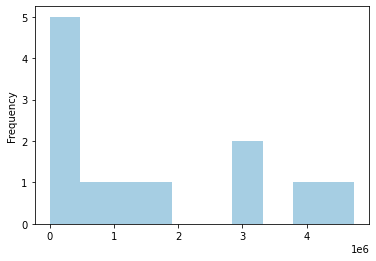

In [16]:
D_1null = D_1.isna().sum().sort_values(ascending = False)
D_1null[D_1null > 0].plot(kind = 'hist')


In [17]:
(D_1.isna().sum()/len(D_1)).sort_values(ascending = False)

D_42    0.856943
D_53    0.738429
D_50    0.568097
D_56    0.540716
D_43    0.299812
D_46    0.219056
D_48    0.129934
D_55    0.033409
D_52    0.005345
D_45    0.000365
D_54    0.000364
D_41    0.000364
D_59    0.000000
D_58    0.000000
D_39    0.000000
D_51    0.000000
D_49    0.000000
D_47    0.000000
D_44    0.000000
D_60    0.000000
dtype: float64

In [18]:
null_columns_d = [col for col in D_1.columns if D_1[col].isnull().any()]
null_columns_d

['D_41',
 'D_42',
 'D_43',
 'D_45',
 'D_46',
 'D_48',
 'D_50',
 'D_52',
 'D_53',
 'D_54',
 'D_55',
 'D_56']

In [19]:
null_80 = [col for col in D_1.columns if D_1[col].isnull().sum() > 0.80 * len(D_1)]
null_80

['D_42']

In [20]:
round(train.isna().sum()/len(train), 4).sort_values(ascending = False)

D_88           0.9989
D_110          0.9943
B_39           0.9939
D_73           0.9899
B_42           0.9871
D_134          0.9648
B_29           0.9310
D_132          0.9019
D_76           0.8875
D_42           0.8569
D_142          0.8293
D_53           0.7384
D_50           0.5681
B_17           0.5672
D_105          0.5462
D_56           0.5407
S_9            0.5304
D_77           0.4545
D_43           0.2998
S_27           0.2533
D_46           0.2191
S_3            0.1845
S_7            0.1845
D_62           0.1371
D_48           0.1299
D_61           0.1081
P_3            0.0545
D_69           0.0352
D_55           0.0334
D_118          0.0319
D_121          0.0319
D_119          0.0319
D_115          0.0319
R_27           0.0233
D_141          0.0184
D_104          0.0184
D_130          0.0184
D_131          0.0184
D_128          0.0184
B_13           0.0090
P_2            0.0083
D_133          0.0077
D_144          0.0074
D_102          0.0073
D_52           0.0053
B_8       

In [21]:
null_99_drop = [col for col in train.columns if train[col].isnull().sum() > 0.99 * len(train)]
null_99_drop

['D_88', 'D_110', 'B_39']

In [22]:
null_columns = [col for col in train.columns if (train[col].isnull().any()) and ( col not in null_99_drop)]
null_columns

['P_2',
 'B_2',
 'S_3',
 'D_41',
 'B_3',
 'D_42',
 'D_43',
 'D_45',
 'D_46',
 'D_48',
 'B_6',
 'B_8',
 'D_50',
 'D_52',
 'P_3',
 'D_53',
 'D_54',
 'S_7',
 'D_55',
 'D_56',
 'B_13',
 'S_9',
 'D_61',
 'B_15',
 'D_62',
 'B_17',
 'D_69',
 'D_73',
 'D_76',
 'R_7',
 'D_77',
 'B_25',
 'B_26',
 'B_27',
 'R_12',
 'R_14',
 'B_29',
 'S_22',
 'S_23',
 'S_24',
 'S_25',
 'S_26',
 'D_102',
 'D_104',
 'D_105',
 'B_37',
 'R_27',
 'D_112',
 'B_40',
 'S_27',
 'D_115',
 'D_118',
 'D_119',
 'D_121',
 'D_128',
 'B_42',
 'D_130',
 'D_131',
 'D_132',
 'D_133',
 'D_134',
 'D_141',
 'D_142',
 'D_144']

In [23]:
D_1null

D_42    4740137
D_53    4084585
D_50    3142402
D_56    2990943
D_43    1658396
D_46    1211699
D_48     718725
D_55     184803
D_52      29563
D_45       2017
D_54       2016
D_41       2016
D_59          0
D_58          0
D_39          0
D_51          0
D_49          0
D_47          0
D_44          0
D_60          0
dtype: int64

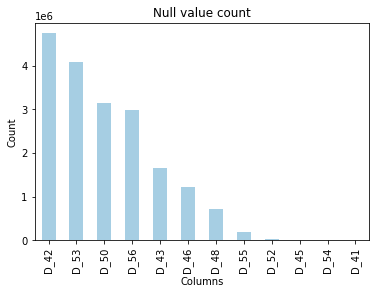

In [24]:
  plt.title('Null value count')
  plt.xlabel('Columns')
  plt.ylabel('Count')
  D_1null = D_1.isna().sum().sort_values(ascending = False)
  D_1null[D_1null > 0].plot(kind = 'bar')
  plt.show()

In [25]:
def show_null(data):
  plt.figure(figsize = (10,10))
  plt.title('Null value count')
  plt.xlabel('Columns')
  plt.ylabel('Count')
  plt.ticklabel_format(style = 'plain')
  data_null = data.isna().sum().sort_values()
  data_null[data_null > 0].plot(kind = 'barh')
  print(data_null[data_null >0])
  plt.show()

D_41        2016
D_54        2016
D_45        2017
D_112       2650
D_52       29563
D_102      40655
D_144      40727
D_133      42716
D_131     101548
D_130     101548
D_128     101548
D_141     101548
D_104     101548
D_115     176716
D_119     176716
D_118     176716
D_121     176716
D_55      184803
D_69      194473
D_61      598052
D_48      718725
D_62      758161
D_46     1211699
D_43     1658396
D_77     2513912
D_56     2990943
D_105    3021431
D_50     3142402
D_53     4084585
D_142    4587043
D_42     4740137
D_76     4908954
D_132    4988874
D_134    5336752
D_73     5475595
D_110    5500117
D_88     5525447
dtype: int64


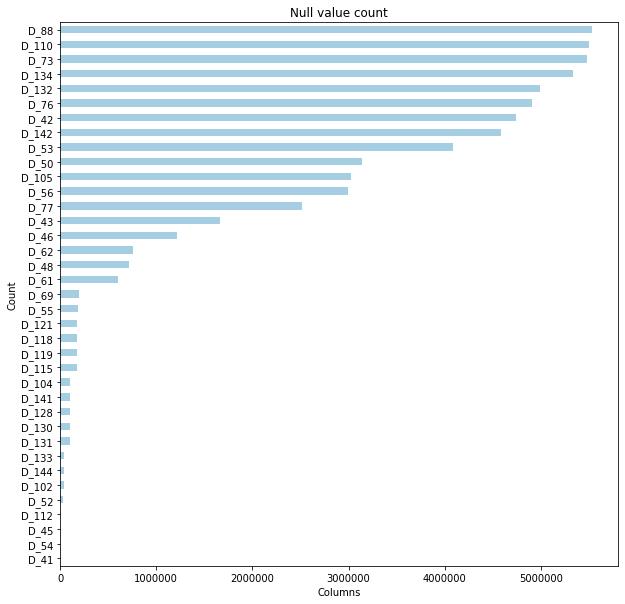

In [26]:
show_null(train[D_columns])



```
# This is formatted as code
```

# S columns - Spend variables

In [27]:
S_columns = [col  for col in train.columns if (col.startswith('S_') and col not in cat_features)]
S_columns

['S_2',
 'S_3',
 'S_5',
 'S_6',
 'S_7',
 'S_8',
 'S_9',
 'S_11',
 'S_12',
 'S_13',
 'S_15',
 'S_16',
 'S_17',
 'S_18',
 'S_19',
 'S_20',
 'S_22',
 'S_23',
 'S_24',
 'S_25',
 'S_26',
 'S_27']

S_23        445
S_26        634
S_25      12847
S_24      18593
S_22      19024
S_7     1020544
S_3     1020544
S_27    1400935
S_9     2933643
dtype: int64


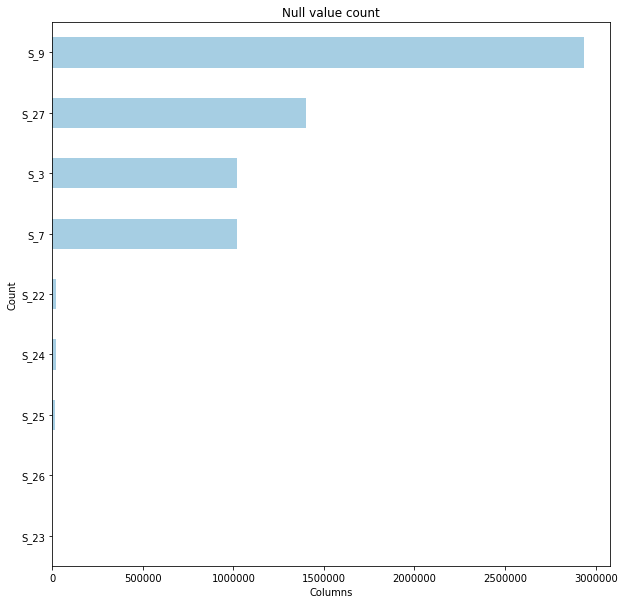

In [28]:
show_null(train[S_columns])

# P_columns - Payment variables

In [29]:
P_columns = [col  for col in train.columns if (col.startswith('P_') and col not in cat_features)]
P_columns

['P_2', 'P_3', 'P_4']

P_2     45985
P_3    301492
dtype: int64


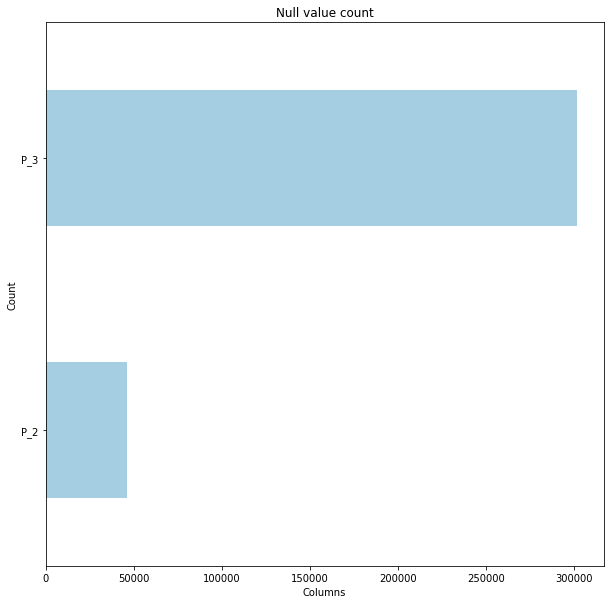

In [30]:
show_null(train[P_columns])

In [90]:
train[P_columns].head(4)

,P_2,P_3,P_4
0,None,None,0.0
1,None,None,0.0
2,None,None,0.0
3,None,None,0.0


In [100]:
train['P_2'].quantile([0.5])

0.5    NaN
Name: P_2, dtype: object

# B_columns - Balance variables

In [31]:
B_columns = [col  for col in train.columns if (col.startswith('B_') and col not in cat_features)]
B_columns

['B_1',
 'B_2',
 'B_3',
 'B_4',
 'B_5',
 'B_6',
 'B_7',
 'B_8',
 'B_9',
 'B_10',
 'B_11',
 'B_12',
 'B_13',
 'B_14',
 'B_15',
 'B_16',
 'B_17',
 'B_18',
 'B_19',
 'B_20',
 'B_21',
 'B_22',
 'B_23',
 'B_24',
 'B_25',
 'B_26',
 'B_27',
 'B_28',
 'B_29',
 'B_31',
 'B_32',
 'B_33',
 'B_36',
 'B_37',
 'B_39',
 'B_40',
 'B_41',
 'B_42']

B_40         53
B_37         56
B_6         233
B_2        2016
B_3        2016
B_27       2016
B_26       2016
B_15       6923
B_25       6923
B_8       22268
B_13      49519
B_17    3137598
B_29    5150035
B_42    5459973
B_39    5497819
dtype: int64


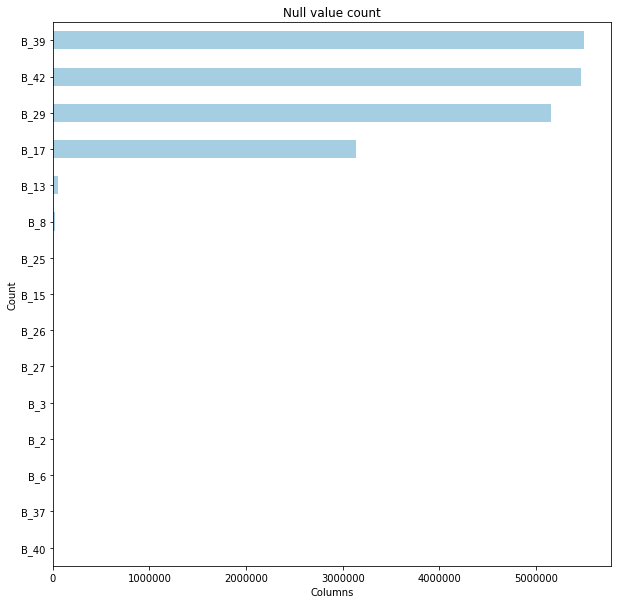

In [32]:
show_null(train[B_columns])

# R columns  - Risk variables

In [33]:
R_columns = [col  for col in train.columns if (col.startswith('R_') and col not in cat_features)]
R_columns

['R_1',
 'R_2',
 'R_3',
 'R_4',
 'R_5',
 'R_6',
 'R_7',
 'R_8',
 'R_9',
 'R_10',
 'R_11',
 'R_12',
 'R_13',
 'R_14',
 'R_15',
 'R_16',
 'R_17',
 'R_18',
 'R_19',
 'R_20',
 'R_21',
 'R_22',
 'R_23',
 'R_24',
 'R_25',
 'R_26',
 'R_27',
 'R_28']

R_7          1
R_14         1
R_12        56
R_27    128703
dtype: int64


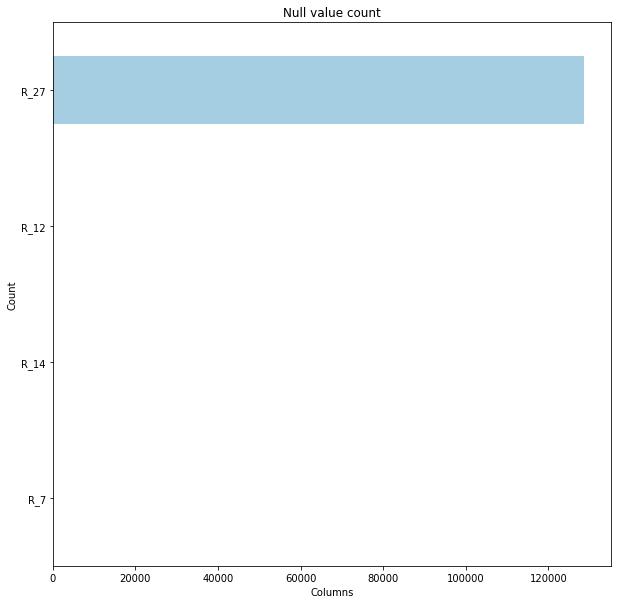

In [34]:
show_null(train[R_columns])

# Categarical Columns

In [35]:
cat_features

['B_30',
 'B_38',
 'D_114',
 'D_116',
 'D_117',
 'D_120',
 'D_126',
 'D_63',
 'D_64',
 'D_66',
 'D_68']

In [36]:
len(cat_features)

11

In [37]:
train[cat_features].dtypes

B_30     int8
B_38     int8
D_114    int8
D_116    int8
D_117    int8
D_120    int8
D_126    int8
D_63     int8
D_64     int8
D_66     int8
D_68     int8
dtype: object

In [38]:
cat_features[0]

'B_30'

In [39]:
train[cat_features[0]].unique()

array([ 0,  2,  1, -1], dtype=int8)

In [40]:
train[cat_features[0]].value_counts(normalize = True)

 0    0.851614
 1    0.138111
 2    0.009910
-1    0.000364
Name: B_30, dtype: float64

In [41]:
train[cat_features].isnull().sum()

B_30     0
B_38     0
D_114    0
D_116    0
D_117    0
D_120    0
D_126    0
D_63     0
D_64     0
D_66     0
D_68     0
dtype: int64

B_30
[ 0  2  1 -1]
 0    0.851614
 1    0.138111
 2    0.009910
-1    0.000364
Name: B_30, dtype: float64


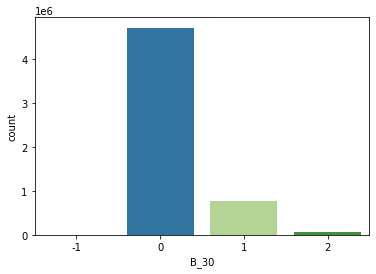

B_38
[ 2  1  3  5  6  7  4 -1]
 2    0.353114
 3    0.226941
 1    0.209718
 5    0.080423
 4    0.053316
 7    0.046828
 6    0.029294
-1    0.000364
Name: B_38, dtype: float64


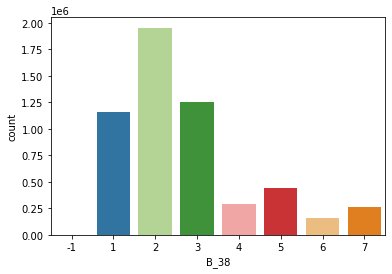

D_114
[ 1  0 -1]
 1    0.599567
 0    0.368485
-1    0.031947
Name: D_114, dtype: float64


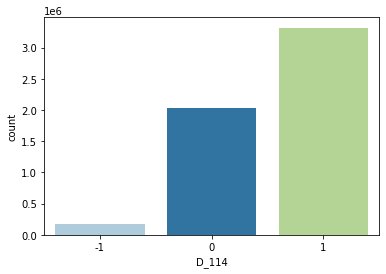

D_116
[ 0 -1  1]
 0    0.966855
-1    0.031947
 1    0.001198
Name: D_116, dtype: float64


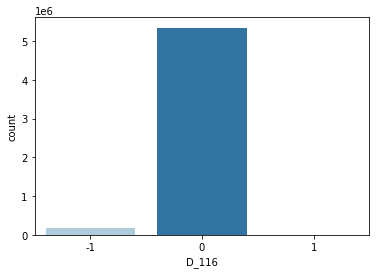

D_117
[ 5  0  7  3  2 -1  4  6]
 0    0.263237
 4    0.210867
 5    0.205853
 3    0.120548
 6    0.083032
 7    0.062284
-1    0.031947
 2    0.022231
Name: D_117, dtype: float64


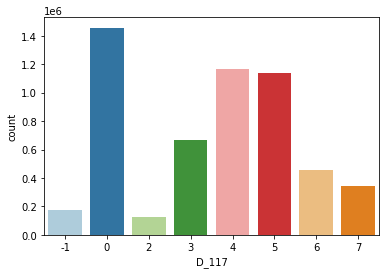

D_120
[ 0  1 -1]
 0    0.855060
 1    0.112992
-1    0.031947
Name: D_120, dtype: float64


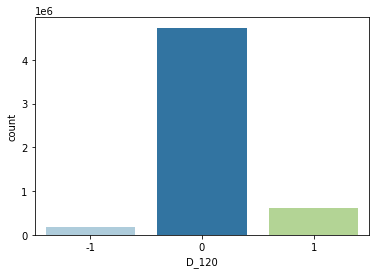

D_126
[ 2 -1  1  0]
 2    0.770578
 1    0.161137
 0    0.047166
-1    0.021119
Name: D_126, dtype: float64


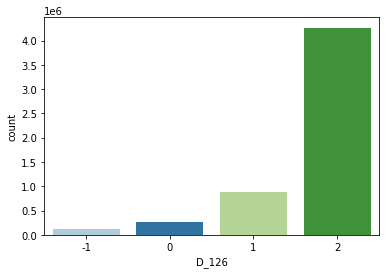

D_63
[0 3 4 1 2 5]
3    0.744763
0    0.168154
4    0.079254
1    0.004662
2    0.001908
5    0.001259
Name: D_63, dtype: float64


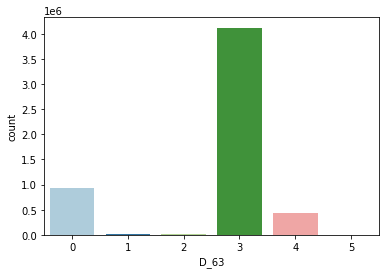

D_64
[ 0  2 -1  3  1]
 0    0.526669
 3    0.275416
 2    0.151879
-1    0.039310
 1    0.006726
Name: D_64, dtype: float64


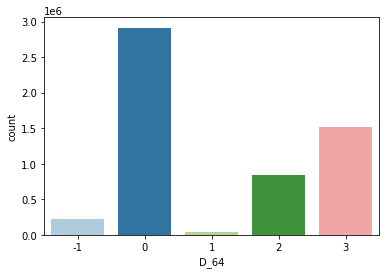

D_66
[-1  1  0]
-1    0.887307
 1    0.111556
 0    0.001137
Name: D_66, dtype: float64


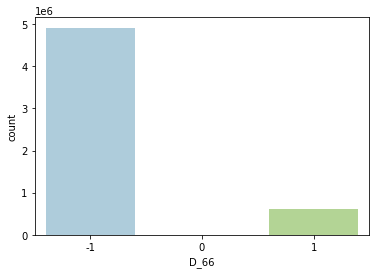

D_68
[ 6  2  3 -1  5  4  0  1]
 6    0.503024
 5    0.217250
 3    0.087580
 4    0.086268
 2    0.039793
-1    0.039140
 1    0.024066
 0    0.002879
Name: D_68, dtype: float64


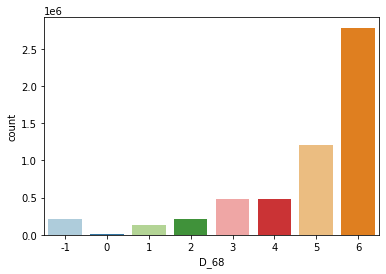

In [42]:
for i in range(0, len(cat_features)):
  print(cat_features[i])
  print(train[cat_features[i]].unique())
  print(train[cat_features[i]].value_counts(normalize = True))
  sns.countplot( x= cat_features[i], data = train)
  plt.show()

# Missing Values processing

In [43]:
round(train.isna().sum()/len(train), 4).sort_values(ascending = False)

D_88           0.9989
D_110          0.9943
B_39           0.9939
D_73           0.9899
B_42           0.9871
D_134          0.9648
B_29           0.9310
D_132          0.9019
D_76           0.8875
D_42           0.8569
D_142          0.8293
D_53           0.7384
D_50           0.5681
B_17           0.5672
D_105          0.5462
D_56           0.5407
S_9            0.5304
D_77           0.4545
D_43           0.2998
S_27           0.2533
D_46           0.2191
S_3            0.1845
S_7            0.1845
D_62           0.1371
D_48           0.1299
D_61           0.1081
P_3            0.0545
D_69           0.0352
D_55           0.0334
D_118          0.0319
D_121          0.0319
D_119          0.0319
D_115          0.0319
R_27           0.0233
D_141          0.0184
D_104          0.0184
D_130          0.0184
D_131          0.0184
D_128          0.0184
B_13           0.0090
P_2            0.0083
D_133          0.0077
D_144          0.0074
D_102          0.0073
D_52           0.0053
B_8       

In [44]:
#null_99_drop = [col for col in train.columns if train[col].isnull().sum() > 0.99 * len(train)]
#null_99_drop

['D_88', 'D_110', 'B_39']

In [ ]:
null_90_drop = [col for col in train.columns if train[col].isnull().sum() > 0.90 * len(train)]
null_90_drop

In [45]:
null_columns = [col for col in train.columns if (train[col].isnull().any()) and ( col not in null_90_drop)]
null_columns

['P_2',
 'B_2',
 'S_3',
 'D_41',
 'B_3',
 'D_42',
 'D_43',
 'D_45',
 'D_46',
 'D_48',
 'B_6',
 'B_8',
 'D_50',
 'D_52',
 'P_3',
 'D_53',
 'D_54',
 'S_7',
 'D_55',
 'D_56',
 'B_13',
 'S_9',
 'D_61',
 'B_15',
 'D_62',
 'B_17',
 'D_69',
 'D_73',
 'D_76',
 'R_7',
 'D_77',
 'B_25',
 'B_26',
 'B_27',
 'R_12',
 'R_14',
 'B_29',
 'S_22',
 'S_23',
 'S_24',
 'S_25',
 'S_26',
 'D_102',
 'D_104',
 'D_105',
 'B_37',
 'R_27',
 'D_112',
 'B_40',
 'S_27',
 'D_115',
 'D_118',
 'D_119',
 'D_121',
 'D_128',
 'B_42',
 'D_130',
 'D_131',
 'D_132',
 'D_133',
 'D_134',
 'D_141',
 'D_142',
 'D_144']

In [46]:
train = train.drop(null_99_drop, axis = 1)


In [47]:
train.head(1)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,0.004709,...,-1,-1,-1,0,0,0.0,NaN,0,0.00061,0


In [48]:
null_columns[5]

'D_42'

In [49]:
len(null_columns)

64

In [50]:
corr_sample = train['D_42'].corr(train[cat_features[1]])
corr_sample

0.02116005289581318

In [51]:
'D_42' in train.columns

True

In [52]:
null_plus_cat_col = null_columns + cat_features
#null_plus_cat_col

In [53]:
null_plus_cat_df = train[null_plus_cat_col]
null_cat_corr = pd.DataFrame(null_plus_cat_df.corr())
null_cat_corr

,P_2,B_2,S_3,D_41,B_3,D_42,D_43,D_45,D_46,D_48,...,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
P_2,1.000000,0.545083,-0.334633,-0.318198,-0.454154,-0.468156,-0.299000,0.342805,-0.159671,-0.760143,...,-0.452315,0.261332,0.073480,0.154245,-0.155536,0.103772,-0.049491,-0.214991,0.026640,0.248103
B_2,0.545083,1.000000,-0.235561,-0.258589,-0.713539,-0.090105,-0.142679,0.171038,-0.127012,-0.571471,...,-0.670766,0.093817,-0.029718,0.078549,-0.117401,-0.006065,-0.156197,-0.129893,0.025522,0.061031
S_3,-0.334633,-0.235561,1.000000,0.084534,0.135866,0.179068,0.160313,-0.176044,0.067160,0.279527,...,0.158313,-0.170248,-0.062265,-0.138543,0.101567,-0.084122,0.032671,0.106962,-0.070872,-0.122742
D_41,-0.318198,-0.258589,0.084534,1.000000,0.240975,0.059239,0.059665,-0.010976,0.009802,0.246998,...,0.225449,0.003111,0.041643,-0.006128,0.053979,0.025559,-0.001078,0.048613,0.000257,0.001265
B_3,-0.454154,-0.713539,0.135866,0.240975,1.000000,0.060099,0.094750,-0.071076,0.107055,0.518180,...,0.668338,-0.025075,0.081697,-0.028874,0.076037,0.044662,0.100214,0.104628,0.001880,0.002366
D_42,-0.468156,-0.090105,0.179068,0.059239,0.060099,1.000000,0.203399,-0.053428,0.075083,0.365035,...,0.021160,-0.114025,-0.044569,-0.085902,0.048151,-0.030936,-0.158544,0.072509,-0.078648,-0.082997
D_43,-0.299000,-0.142679,0.160313,0.059665,0.094750,0.203399,1.000000,-0.188801,0.095724,0.213693,...,0.111883,-0.113605,-0.048780,-0.067433,0.160412,-0.038587,0.068557,0.088538,-0.026883,-0.131157
D_45,0.342805,0.171038,-0.176044,-0.010976,-0.071076,-0.053428,-0.188801,1.000000,-0.074378,-0.226455,...,-0.121143,0.266042,0.150388,0.144187,-0.080489,0.191352,-0.273744,-0.109755,-0.070211,0.309702
D_46,-0.159671,-0.127012,0.067160,0.009802,0.107055,0.075083,0.095724,-0.074378,1.000000,0.241802,...,0.065398,-0.033901,-0.000194,-0.013922,0.042454,-0.007392,0.029181,0.034260,-0.000955,-0.045981
D_48,-0.760143,-0.571471,0.279527,0.246998,0.518180,0.365035,0.213693,-0.226455,0.241802,1.000000,...,0.479440,-0.153251,-0.028749,-0.107365,0.121851,-0.037889,0.028322,0.149903,-0.013848,-0.140632


In [54]:
test_p2 = pd.DataFrame(null_cat_corr['P_2']).drop(labels = 'P_2', axis = 0).abs().sort_values(by = 'P_2', ascending = False)
test_p2_result = test_p2.iloc[0:1]
test_p2_result

,P_2
D_48,0.760143


In [55]:
test_b2 = pd.DataFrame(null_cat_corr['B_2']).drop(labels = 'B_2', axis = 0).abs().sort_values(by = 'B_2', ascending = False)
test_b2_result = test_b2.iloc[0:1]
test_b2_result 


,B_2
B_3,0.713539


In [74]:
cat_plus = ['B_2'] + cat_features
cat_plus

['B_2',
 'B_30',
 'B_38',
 'D_114',
 'D_116',
 'D_117',
 'D_120',
 'D_126',
 'D_63',
 'D_64',
 'D_66',
 'D_68']

In [77]:
pd.DataFrame(null_cat_corr['B_2']).drop(labels = null_columns, axis = 0)

,B_2
B_30,-0.596594
B_38,-0.670766
D_114,0.093817
D_116,-0.029718
D_117,0.078549
D_120,-0.117401
D_126,-0.006065
D_63,-0.156197
D_64,-0.129893
D_66,0.025522


In [75]:
test_b2_2 = pd.DataFrame(null_cat_corr['B_2']).drop(labels = cat_plus, axis = 0).abs().sort_values(by = 'B_2', ascending = False)
test_b2_result2 = test_b2_2.iloc[0:1]
test_b2_result2 

,B_2
B_3,0.713539


In [56]:
test_s3 = pd.DataFrame(null_cat_corr['S_3']).drop(labels = 'S_3', axis = 0).abs().sort_values(by = 'S_3', ascending = False)
test_s3_result = test_s3.iloc[0:1]
test_s3_result 

,S_3
S_7,0.904635


In [57]:
pd.concat([test_p2_result,test_b2_result , test_s3_result ])

,P_2,B_2,S_3
D_48,0.760143,NaN,NaN
B_3,NaN,0.713539,NaN
S_7,NaN,NaN,0.904635


In [78]:
null_cat_df_topcorr = pd.DataFrame()
for i in range(0, len(null_columns)):
  j = null_columns[i]
  df = pd.DataFrame(null_cat_corr[j]).drop(labels = null_columns, axis = 0).abs().sort_values(by = j, ascending = False).iloc[0:1]
  null_cat_df_topcorr = null_cat_df_topcorr.append(df)

In [79]:
null_cat_df_topcorr

,P_2,B_2,S_3,D_41,B_3,D_42,D_43,D_45,D_46,D_48,...,D_128,B_42,D_130,D_131,D_132,D_133,D_134,D_141,D_142,D_144
B_38,0.452315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_38,NaN,0.670766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D_114,NaN,NaN,0.170248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_38,NaN,NaN,NaN,0.225449,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_30,NaN,NaN,NaN,NaN,0.690537,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D_63,NaN,NaN,NaN,NaN,NaN,0.158544,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D_120,NaN,NaN,NaN,NaN,NaN,NaN,0.160412,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D_68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.309702,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102961,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.47944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
null_cat_df_topcorr['P_2'][0]

0.4523153149184162

In [81]:
null_cat_df_topcorr = null_cat_df_topcorr.reset_index()

In [82]:
null_cat_df_topcorr

,index,P_2,B_2,S_3,D_41,B_3,D_42,D_43,D_45,D_46,...,D_128,B_42,D_130,D_131,D_132,D_133,D_134,D_141,D_142,D_144
0,B_38,0.452315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B_38,NaN,0.670766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D_114,NaN,NaN,0.170248,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B_38,NaN,NaN,NaN,0.225449,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B_30,NaN,NaN,NaN,NaN,0.690537,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,D_63,NaN,NaN,NaN,NaN,NaN,0.158544,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,D_120,NaN,NaN,NaN,NaN,NaN,NaN,0.160412,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,D_68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.309702,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,B_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.102961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,B_38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
null_cat_df_topcorr.iloc[0,0]  # correlated categorical features

'B_38'

In [84]:
null_cat_df_topcorr.iloc[1,0]  # correlated categorical features for number two null_columns

'B_38'

In [85]:
null_cat_df_topcorr.columns[1] # first null column

'P_2'

In [89]:
# train.groupby(cat_col)[null_col].median()  
# according to cat_col to get null_col's median to fill into
train.groupby('B_38')['P_2'].max()

B_38
-1   NaN
 1   NaN
 2   NaN
 3   NaN
 4   NaN
 5   NaN
 6   NaN
 7   NaN
Name: P_2, dtype: float64

In [88]:
train['P_2']

In [67]:
#train= train.fillna(100)

In [68]:
#train.isnull().sum()

In [ ]:
for i in range(0, len(null_columns)):
  fill_null_col = null_cat_df_topcorr.columns[i + 1]
  corr_cat_col = null_cat_df_topcorr.iloc[i,0] 
  train[fill_null_col] = train[fill_null_col].fillna(train.groupby(corr_cat_col)[fill_null_col].transform('median'), inplace = True)

In [ ]:
train.isnull().sum()

In [ ]:
round(train.isna().sum()/len(train), 4).sort_values(ascending = False)

# Save Data 

In [79]:
# save file
#path = '/content/drive/MyDrive/Amex_Default_Prediction_Kaggle_Competition'
#data_train.to_parquet(path + '/processed_train.parquet', engine = 'pyarrow')
#data_test.to_parquet(path + '/processed_test.parquet', engine = 'pyarrow')